# 🧠 Feature Selection Demo
This notebook demonstrates **filter-based** and **wrapper-based** feature selection methods using scikit-learn.

In [22]:
import time  # For measuring execution time
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For enhanced data visualization
from sklearn import datasets  # To load standard datasets
from sklearn.feature_selection import SelectKBest, f_classif  # For filter-based feature selection
from sklearn.feature_selection import RFE  # For wrapper-based feature selection
from sklearn.linear_model import LogisticRegression  # Machine learning model for RFE
from sklearn.preprocessing import StandardScaler  # For feature scaling

sns.set(style="whitegrid")

In [23]:
def load_dataset(choice):
    """
    Load the selected dataset based on user input.
    """
    if choice == '1':
        data = datasets.load_iris()
    elif choice == '2':
        data = datasets.load_wine()
    elif choice == '3':
        data = datasets.load_breast_cancer()
    else:
        raise ValueError("Invalid choice. Please select 1, 2, or 3.")
    
    X = pd.DataFrame(data.data, columns=data.feature_names)
    y = pd.Series(data.target)
    return X, y, data

In [24]:
def filter_method(X, y, k=5):
    """
    Apply the Filter method using SelectKBest with ANOVA F-test.
    """
    start_time = time.time()
    selector = SelectKBest(score_func=f_classif, k=k)
    selector.fit(X, y)
    scores = selector.scores_
    selected_features = X.columns[selector.get_support()]
    elapsed_time = time.time() - start_time
    return scores, selected_features, elapsed_time

In [25]:
def wrapper_method(X, y, k=5):
    """
    Apply the Wrapper method using Recursive Feature Elimination (RFE).
    """
    start_time = time.time()
    model = LogisticRegression(max_iter=1000, solver='liblinear')
    rfe = RFE(model, n_features_to_select=k)
    rfe.fit(X, y)
    original_ranking = rfe.ranking_
    max_rank = np.max(original_ranking)
    adjusted_scores = max_rank - original_ranking + 1
    selected_features = X.columns[rfe.support_]
    elapsed_time = time.time() - start_time
    return adjusted_scores, selected_features, elapsed_time

In [26]:
def plot_filter_scores(feature_names, scores, dataset_name):
    """
    Plot the ANOVA F-scores for each feature obtained from the Filter method.
    """
    df = pd.DataFrame({'Feature': feature_names, 'Score': scores}).sort_values(by='Score', ascending=False)
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Score', y='Feature', data=df, palette='viridis')
    plt.title(f'Filter Method: ANOVA F-scores for {dataset_name} Dataset')
    plt.xlabel('ANOVA F-score')
    plt.ylabel('Features')
    plt.tight_layout()
    plt.show()

def plot_wrapper_scores(feature_names, scores, dataset_name):
    """
    Plot the adjusted importance scores from the Wrapper method (RFE).
    """
    df = pd.DataFrame({'Feature': feature_names, 'Adjusted Score': scores}).sort_values(by='Adjusted Score', ascending=False)
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Adjusted Score', y='Feature', data=df, palette='magma')
    plt.title(f'Wrapper Method: Feature Importance Scores for {dataset_name} Dataset')
    plt.xlabel('Importance Score (Higher = More Important)')
    plt.ylabel('Features')
    plt.tight_layout()
    plt.show()

In [27]:
def main():
    """
    Main function to execute the feature selection process.
    """
    print("Select a dataset for feature selection:")
    print("1. Iris")
    print("2. Wine")
    print("3. Breast Cancer")
    
    choice = input("Enter the number corresponding to your choice (1/2/3): ").strip()
    try:
        X, y, data = load_dataset(choice)
    except ValueError as e:
        print(e)
        return

    dataset_name = data.DESCR.split('\n')[0]
    print(f"\nYou selected the {dataset_name} dataset.")
    print(f"Number of samples: {X.shape[0]}")
    print(f"Number of features: {X.shape[1]}\n")

    scaler = StandardScaler()
    X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

    print("Performing Feature Selection using Filter Method (SelectKBest)...")
    filter_scores, filter_selected, filter_time = filter_method(X, y, k=5)
    print(f"Selected Features (Filter): {list(filter_selected)}")
    print(f"Time taken for Filter Method: {filter_time:.4f} seconds\n")

    print("Performing Feature Selection using Wrapper Method (RFE)...")
    wrapper_scores, wrapper_selected, wrapper_time = wrapper_method(X_scaled, y, k=5)
    print(f"Selected Features (Wrapper): {list(wrapper_selected)}")
    print(f"Time taken for Wrapper Method: {wrapper_time:.4f} seconds\n")

    plot_filter_scores(X.columns, filter_scores, dataset_name)
    plot_wrapper_scores(X.columns, wrapper_scores, dataset_name)

Select a dataset for feature selection:
1. Iris
2. Wine
3. Breast Cancer

You selected the .. _breast_cancer_dataset: dataset.
Number of samples: 569
Number of features: 30

Performing Feature Selection using Filter Method (SelectKBest)...
Selected Features (Filter): ['mean perimeter', 'mean concave points', 'worst radius', 'worst perimeter', 'worst concave points']
Time taken for Filter Method: 0.0030 seconds

Performing Feature Selection using Wrapper Method (RFE)...
Selected Features (Wrapper): ['radius error', 'worst radius', 'worst texture', 'worst area', 'worst concave points']
Time taken for Wrapper Method: 0.1341 seconds



C:\Users\eamon\AppData\Local\Temp\ipykernel_22252\2373296878.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Score', y='Feature', data=df, palette='viridis')


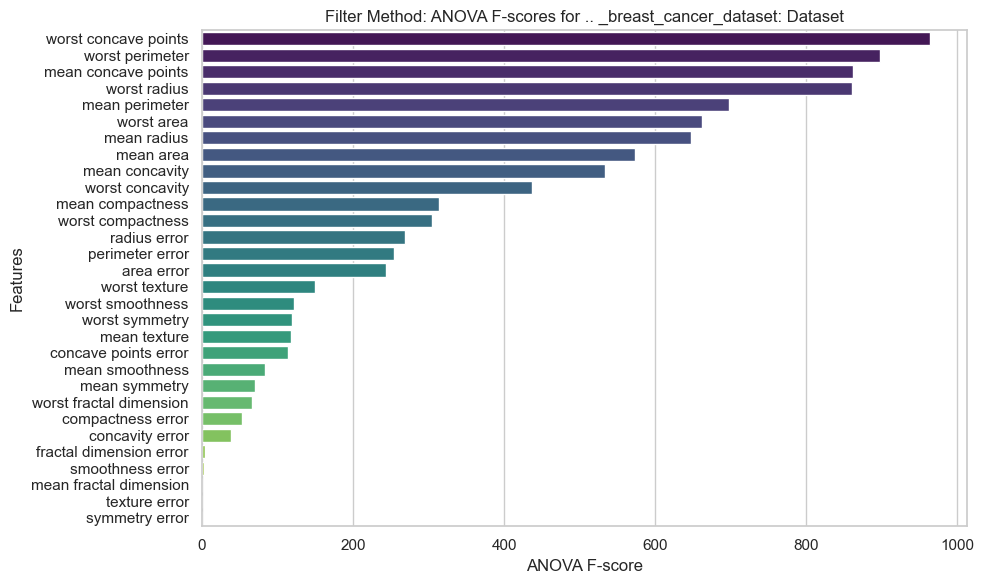

C:\Users\eamon\AppData\Local\Temp\ipykernel_22252\2373296878.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Adjusted Score', y='Feature', data=df, palette='magma')


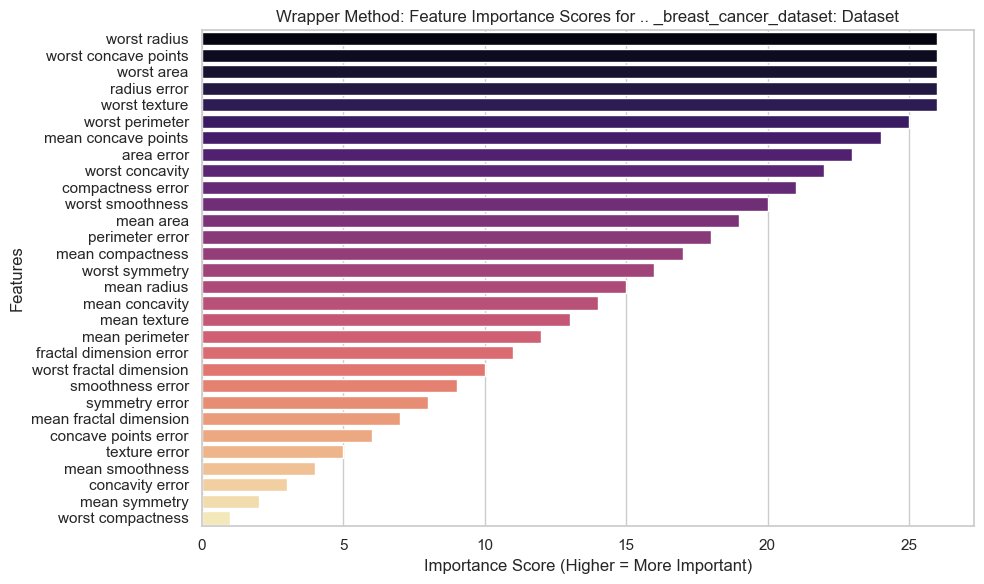

In [28]:
if __name__ == "__main__":
    main()